## A partir do dataset escolhido para trabalhar com os métodos supervisionados e a biblioteca scikitlearn do Python, realize as seguintes tarefas:
#### 1. Identifique o atributo alvo

In [1]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('../files-dataframes/GRAPE_QUALITY.csv')
df

,sample_id,variety,region,quality_score,quality_category,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
0,1,Riesling,Barossa Valley,2.11,Medium,13.70,3.17,251.81,18.58,2023-09-04,8.4,55.9,223.3
1,2,Pinot Noir,Loire Valley,2.83,High,20.84,3.15,289.00,22.08,2023-09-16,8.8,36.9,312.1
2,3,Sauvignon Blanc,Napa Valley,3.52,Premium,27.46,4.07,125.14,21.40,2023-08-25,11.1,64.9,698.7
3,4,Riesling,Napa Valley,2.28,Medium,24.64,3.15,237.46,12.31,2023-09-13,8.0,54.5,660.1
4,5,Merlot,Napa Valley,2.90,High,26.13,3.18,221.52,12.24,2023-08-11,11.2,36.3,410.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sauvignon Blanc,Napa Valley,3.14,High,23.14,4.01,182.63,23.46,2023-09-09,10.1,53.2,363.9
996,997,Cabernet Sauvignon,Sonoma,2.65,High,29.13,3.02,150.32,11.79,2023-08-19,9.0,56.7,325.7
997,998,Pinot Noir,Napa Valley,2.11,Medium,11.38,3.23,168.37,14.92,2023-08-28,10.6,66.5,473.2
998,999,Zinfandel,Loire Valley,2.28,Medium,11.14,3.21,208.98,22.24,2023-08-24,8.9,43.8,745.1


In [3]:
features = ['sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']
X = df[features]
y = df['quality_category']


In [4]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

new_grape = [[21.0, 3.9, 140, 18, 10.0, 20.2, 425.7]]


### Execute o algoritmo K-NN aplicando cross-validation (validação cruzada) para 10 KFolds.

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)

kf = KFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(knn, X, y_encoded, cv=kf)

# Resultados
print(f"Pontos de validação cruzada para cada dobra: {scores}")
print(f"Acurácia média: {scores.mean()}")
print(f"Desvio padrão da acurácia: {scores.std()}")

Pontos de validação cruzada para cada dobra: [0.56 0.68 0.54 0.59 0.54 0.5  0.56 0.48 0.53 0.44]
Acurácia média: 0.542
Desvio padrão da acurácia: 0.06177378084592201


### Execute o algoritmo K-NN aplicando Holdout, dividindo o dataset em 30% para teste.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1)


k=1, Acurácia=0.5466666666666666
k=2, Acurácia=0.5133333333333333
k=3, Acurácia=0.58
k=4, Acurácia=0.54
k=5, Acurácia=0.5233333333333333
k=6, Acurácia=0.5
k=7, Acurácia=0.5066666666666667
k=8, Acurácia=0.4866666666666667
k=9, Acurácia=0.49333333333333335
k=10, Acurácia=0.49


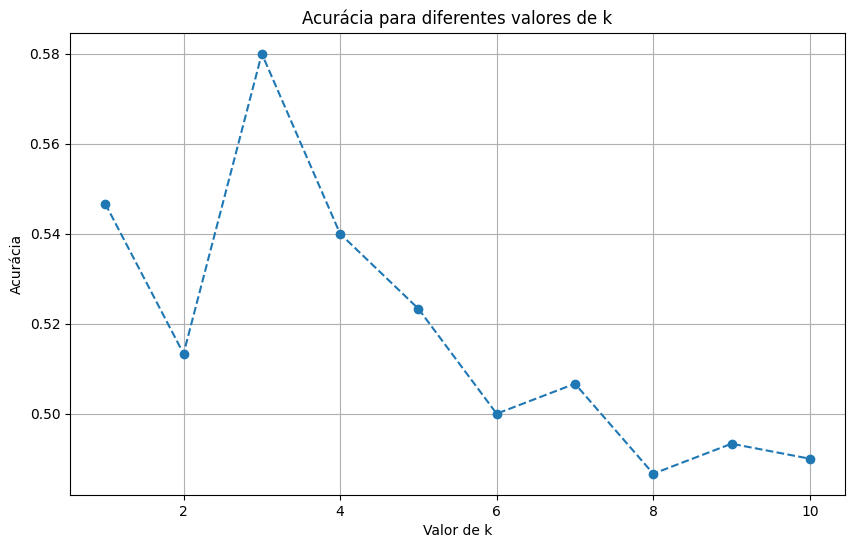

In [7]:
k_values = range(1, 11) 
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, Acurácia={accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia para diferentes valores de k')
plt.grid(True)
plt.show()


### Analise e compare os resultados obtidos, utilizando a matriz de confusão e computando a acurácia.

In [8]:
best_k = k_values[accuracies.index(max(accuracies))]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
cm = confusion_matrix(y_test, y_pred)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

print("Relatório de Classificação para o melhor valor de k:")
print(report)